In [1]:
%matplotlib inline

import textwrap

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk", font_scale=0.8)

In [2]:
# Getting data
resp = requests.get('https://vigilo.jesuisundesdeux.org/get_issues.php')
df = pd.DataFrame(resp.json())
df.time = pd.to_datetime(df.time, unit='s')

resp = requests.get('https://vigilo.jesuisundesdeux.org/get_categories.php')
cat = resp.json()

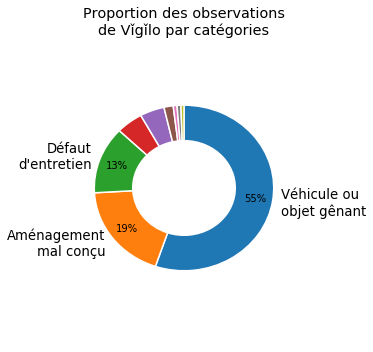

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))

size = 0.3
min_proportion = 0.1
cmap = plt.get_cmap("tab20c")

count = df.groupby('categorie')['token'].count().sort_values(ascending=False)
total = count.sum()


def prct(x):
    if x < min_proportion * 100:
        return ''
    return "{0:.0%}".format(x / 100)


patches, text, autotext = ax.pie(x=count,
                                 radius=1 - size,
                                 wedgeprops=dict(width=size, edgecolor='w'),
                                 startangle=90,
                                 labels=['\n'.join(textwrap.wrap(cat[x].replace(' (gcum)', ''), 12))
                                         if (count[x] / total) > min_proportion
                                         else ''
                                         for x in count.index],
                                 labeldistance=1.1,
                                 counterclock=False,
                                 autopct=prct,
                                 pctdistance=0.8)

plt.title("Proportion des observations\nde Vǐgǐlo par catégories")

plt.tight_layout()
plt.show()